In [ ]:
import pandas as pd
#Dataset import on pandas Data frames
DatasetCyclists = pd.read_csv("dataset/cyclists_filled.csv")
DatasetRace = pd.read_csv("dataset/races_filled.csv")

MergedDataset = pd.merge(DatasetCyclists, DatasetRace.drop(columns=['name']), left_on='_url', right_on='cyclist', suffixes=('_cyclist', '_race')).drop(columns=['_url_cyclist']) 

MergedDataset.head(10)

,name,birth_year,weight,height,nationality,_url_race,points,uci_points,length,climb_total,...,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta,race_year
0,Bruno Surra,1964.0,61.255717,174.432356,Italy,vuelta-a-espana/1989/stage-1,0.0,0.0,20100.0,588.0,...,1989-04-24 00:25:33,111,bruno-surra,25.0,True,False,False,NaN,15.0,1989
1,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1997/stage-2,0.0,0.0,262000.0,2808.0,...,1997-07-07 06:27:47,133,gerard-rue,32.0,True,False,False,denmark-1991,0.0,1997
2,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1990/stage-1,0.0,0.0,138500.0,1232.0,...,1990-07-01 03:29:36,67,gerard-rue,25.0,True,False,False,france-1978,635.0,1990
3,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1992/stage-7,0.0,0.0,196500.0,2010.0,...,1992-07-11 04:22:52,36,gerard-rue,27.0,True,False,False,france-1978,65.0,1992
4,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1990/stage-9,0.0,0.0,196000.0,2381.0,...,1990-07-09 04:46:44,42,gerard-rue,25.0,True,False,False,france-1978,37.0,1990
5,Gérard Rué,1965.0,74.000000,182.000000,France,la-fleche-wallone/1996/result,5.0,6.0,200500.0,3237.0,...,1996-04-17 04:42:20,36,gerard-rue,31.0,False,False,False,czechoslovakia-1987,140.0,1996
6,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1991/stage-12,8.0,1.0,192000.0,4000.0,...,1991-07-18 05:22:47,11,gerard-rue,26.0,True,False,False,norway-1987,415.0,1991
7,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1989/stage-17,0.0,0.0,165000.0,5000.0,...,1989-07-19 05:18:23,25,gerard-rue,24.0,True,False,False,carrera-inoxpran-1985,464.0,1989
8,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1997/stage-5,0.0,0.0,261300.0,2212.0,...,1997-07-10 06:20:08,109,gerard-rue,32.0,True,False,False,denmark-1991,204.0,1997
9,Gérard Rué,1965.0,74.000000,182.000000,France,tour-de-france/1992/stage-15,0.0,0.0,198000.0,2662.0,...,1992-07-20 04:45:19,30,gerard-rue,27.0,True,False,False,france-1978,80.0,1992


In [5]:
from sklearn.model_selection import train_test_split

# Dividi in train e test (80% training, 20% test)
train, test = train_test_split(MergedDataset, test_size=0.2, random_state=42)

# Se stai usando l'outlier detection senza target, puoi dividere solo il dataset di caratteristiche
# Dividi il dataset (senza colonna target) in 80% training e 20% test
train_data, test_data = train_test_split(MergedDataset, test_size=0.2, random_state=42)

In [8]:
import pandas as pd
print(pd.__version__)  # Check the version


2.2.2


In [ ]:
#pip install --upgrade pandas


ERROR: Could not install packages due to an OSError: [WinError 5] Accesso negato: 'C:\\Users\\hp\\anaconda3\\Lib\\site-packages\\~andas.libs\\msvcp140-ef6047a69b174ada5cb2eff1d2bc9a62.dll'
Consider using the `--user` option or check the permissions.




     ---------------------------------------- 11.6/11.6 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

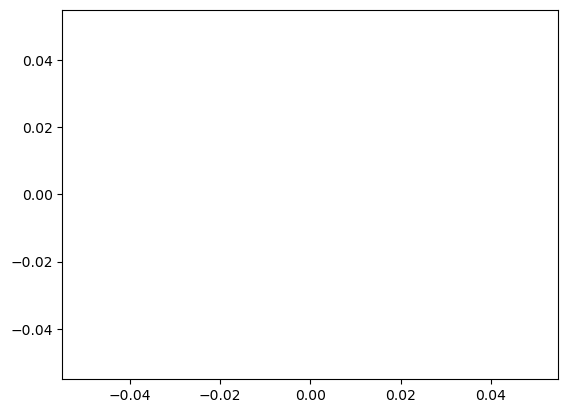

In [ ]:
from sklearn.mixture import GaussianMixture 
import numpy as np
import seaborn as sns

# Ensure only numeric columns are used
numeric_features = MergedDataset.select_dtypes(include="number")
k = 5  # Adjust k based on your understanding of clusters
algorithm = GaussianMixture(n_components=k, random_state=0)
algorithm.fit(numeric_features.values)

# Compute outlier degrees
outlier_degrees_per_normal = algorithm.predict_proba(numeric_features.values)
outlier_degrees = outlier_degrees_per_normal.max(axis=1)

# Add outlier degrees to the original dataset
MergedDataset["density_degree"] = outlier_degrees

# Sort and plot the outlier scores
sorted_outlier_degrees = sorted(outlier_degrees)
outlier_degrees_cdf = np.cumsum(sorted_outlier_degrees)

sns.lineplot(
    x=range(MergedDataset.shape[0]),
    y=sorted_outlier_degrees
)
